# Problema

Implementación de la regresión lineal

## Instrucciones

Generar una implementación correcta de la regresión lineal usando el descenso del gradiente como método de optimización de los pesos y compararlo con la implementación directa de la librería sklearn (los valores de w y b no serán exactamente iguales pero muy similares)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error



In [2]:
# Generación del dataset
np.random.seed(0)  # Para reproducibilidad
X = np.random.uniform(1, 10, 5000)  # Generar 5000 valores aleatorios para las horas de estudio
error = np.random.normal(0, 5, 5000)  # Generar errores aleatorios
y = 50 + 5 * X + error  # Generar la puntuación del examen


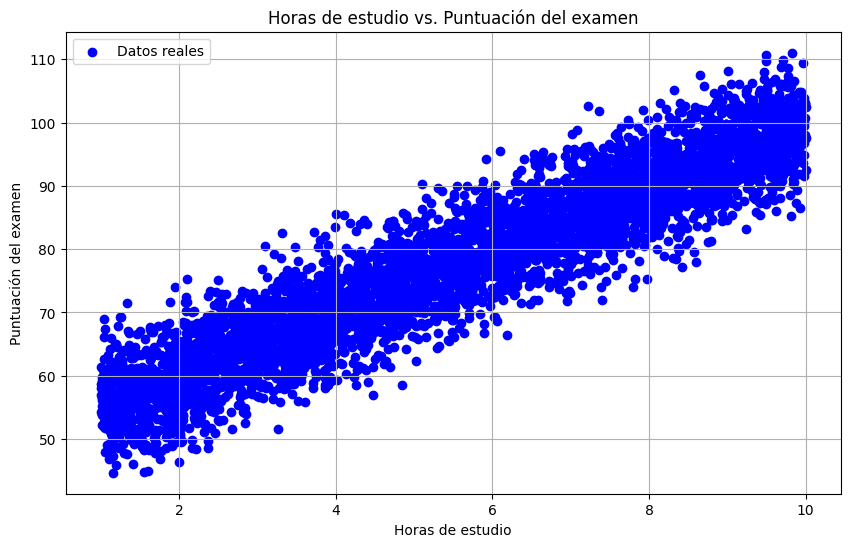

In [3]:
# Visualización de los datos
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos reales')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# %% [code]
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
# 80 % TRAIN Y VAL 20 % TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print('Datos de Entrenamiento:', X_train.shape[0])
print('Datos de Validación:', X_val.shape[0])
print('Datos de Test:', X_test.shape[0])


Datos de Entrenamiento: 3200
Datos de Validación: 800
Datos de Test: 1000


In [15]:
# Función de costo (Mean Squared Error)
def cost_function(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [16]:
# Gradiente descendente para ajustar los parámetros del modelo
def train_regression(X_train, y_train, X_val, y_val, lr, epochs):

    n = X_train.shape[0]
    w = 0
    b = 0
    train_loss_per_epoch = []
    val_loss_per_epoch = []

    for epoch in range(epochs):
        # Calcular y_pred del conjunto de entrenamiento
        y_pred_train = X_train * w + b

        # Calcular la pérdida de entrenamiento
        train_loss = cost_function(y_train, y_pred_train)
        train_loss_per_epoch.append(train_loss)

        # Calcular los gradientes para los pesos w y b
        dw = (-2 / n) * np.sum(X_train * (y_train - y_pred_train))
        db = (-2 / n) * np.sum(y_train - y_pred_train)

        # Actualizar los pesos w y b
        w -= lr * dw
        b -= lr * db

        # Calcular y_pred del conjunto de validación
        y_pred_val = X_val * w + b

        # Calcular la pérdida de validación
        val_loss = cost_function(y_val, y_pred_val)
        val_loss_per_epoch.append(val_loss)

    return w, b, train_loss_per_epoch, val_loss_per_epoch


In [17]:
# %% [code]
# Hiperparámetros
lr = 0.001
epochs = 100

In [18]:
# Entrenar el modelo
w, b, train_loss_per_epoch, val_loss_per_epoch = train_regression(X_train, y_train, X_val, y_val, lr=lr, epochs=epochs)


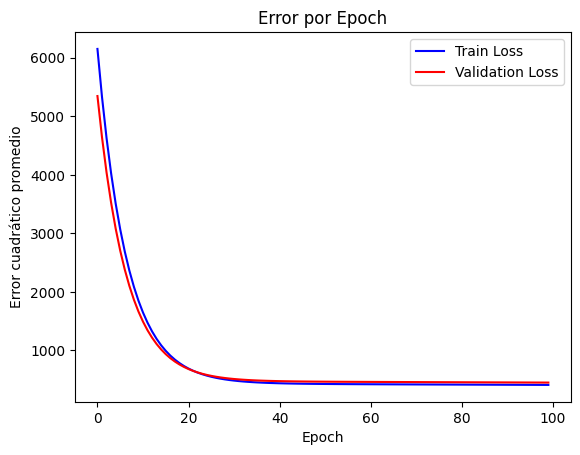

In [19]:
# %% [code]
# Visualización del error de entrenamiento por epoch
plt.figure()
plt.plot(range(epochs), train_loss_per_epoch, '-b', label='Train Loss')
plt.plot(range(epochs), val_loss_per_epoch, '-r', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Error cuadrático promedio')
plt.title('Error por Epoch')
plt.legend()
plt.show()


In [20]:
# %% [code]
# Realizar predicciones en test
y_pred = X_test * w + b

# Calcular el costo
cost = cost_function(y_test, y_pred)

print("Costo del modelo:", cost)

Costo del modelo: 436.6916239309593


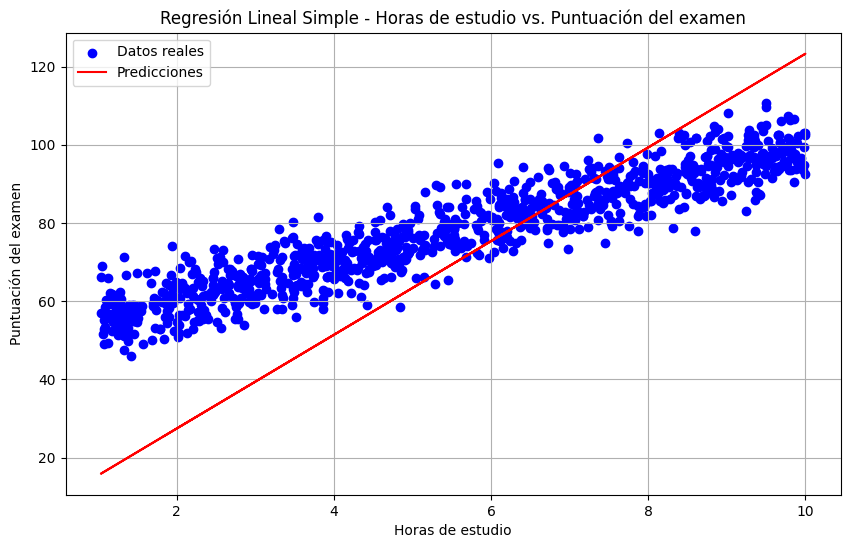

In [21]:
# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# %% [code]
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)


In [23]:
print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)

MSE en el conjunto de test: 436.6916239309593
MAE en el conjunto de test: 17.731855532754444
R^2 en el conjunto de test: -1.1909019786246815
MAPE en el conjunto de test: 0.25154849414814007


In [24]:
# %% [code]
# Crear el modelo de regresión lineal con sklearn
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train.reshape(-1, 1), y_train)

# %% [code]
# Realizar predicciones en test
y_pred = model.predict(X_test.reshape(-1, 1))

# Calcular el costo
cost = mean_squared_error(y_test, y_pred)

print("Costo del modelo:", cost)

Costo del modelo: 25.252964425596577


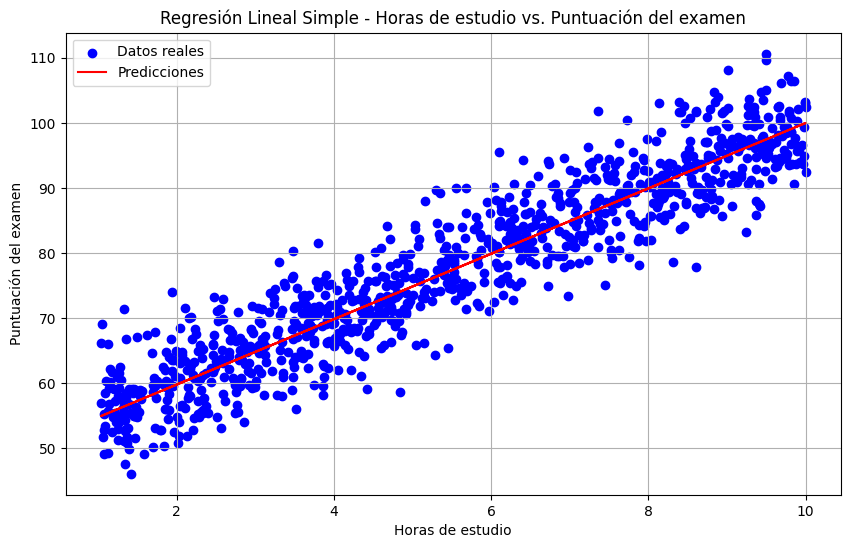

In [25]:
# Visualización del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', label='Predicciones')
plt.xlabel('Horas de estudio')
plt.ylabel('Puntuación del examen')
plt.title('Regresión Lineal Simple - Horas de estudio vs. Puntuación del examen')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
# %% [code]
# Calcular las métricas de evaluación mse, mae, r2 y mape
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MSE en el conjunto de test:", mse)
print("MAE en el conjunto de test:", mae)
print("R^2 en el conjunto de test:", r2)
print("MAPE en el conjunto de test:", mape)


MSE en el conjunto de test: 25.252964425596577
MAE en el conjunto de test: 3.954905594471453
R^2 en el conjunto de test: 0.8733047150569452
MAPE en el conjunto de test: 0.052580324017615095


In [27]:
# %% [markdown]
## Comparación de parámetros obtenidos

# %% [code]
b_sklearn = model.intercept_
w_sklearn = model.coef_[0]

print("Coeficiente de intercepción (b) - Manual:", b)
print("Coeficiente de pendiente (w) - Manual:", w)
print("Coeficiente de intercepción (b) - Scikit-learn:", b_sklearn)
print("Coeficiente de pendiente (w) - Scikit-learn:", w_sklearn)

Coeficiente de intercepción (b) - Manual: 3.5087633672167677
Coeficiente de pendiente (w) - Manual: 11.979860924047031
Coeficiente de intercepción (b) - Scikit-learn: 49.7409163841056
Coeficiente de pendiente (w) - Scikit-learn: 5.024644665080553
